In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../src/')
from random_graph import RandGraph
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [27]:
g = RandGraph(actors=1000, graph_type='medium')

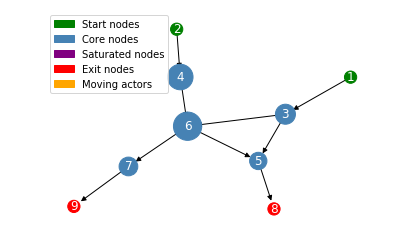

In [28]:
g.plot()

In [29]:
g.graph.nodes(data=True)

NodeDataView({1: {'actors': None}, 2: {'actors': None}, 3: {'capacity': 5, 'actors': None}, 4: {'capacity': 10, 'actors': None}, 5: {'capacity': 3, 'actors': None}, 6: {'capacity': 13, 'actors': None}, 7: {'capacity': 4, 'actors': None}, 8: {'actors': None}, 9: {'actors': None}})

In [31]:
g.controllable_intersections

[(3, 5), (3, 6), (6, 5), (6, 7)]

In [30]:
g.action(0,0.0)

(array([[ 0. ,  0.1,  0. ,  0. ,  0. ]]), 0.0)

In [34]:
congestion = []
for i in range(100):
    cong,reward = g.action(0,0)
    congestion.append( np.mean(cong))

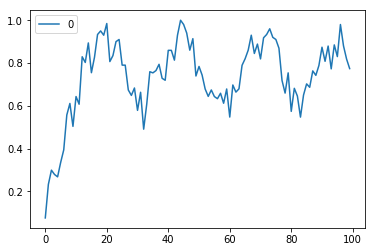

In [35]:
pd.DataFrame(congestion).plot()
plt.show()

In [49]:
def periodic_signal(steps, period):
    j = 0
    signal = []
    for i in range(steps):
        j += 1/period
        if i % period == 0:
            j = 0
        signal.append(j)
    return signal

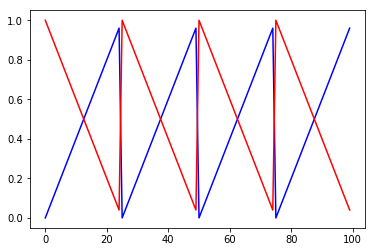

In [50]:
signal = periodic_signal(100, 25)
df = pd.DataFrame(signal)

plt.plot(df, 'b')
plt.plot(1-df, 'r')
plt.show()

In [60]:
1 - df.loc[3]

0    0.88
Name: 3, dtype: float64

In [142]:
# generator
def get_action(steps, intersections, period):
    sign = 1
    signal = periodic_signal(steps, period)
    for i in range(int(steps/len(intersections))):
        if i % int(period/2) == 0:
            sign = -sign
        for inter in intersections:
            act = inter
            val = signal[i] * sign
            yield act, val
        

In [144]:
gen = get_action(100, [0,4], 25)

In [145]:
next(gen)

(0, 0)

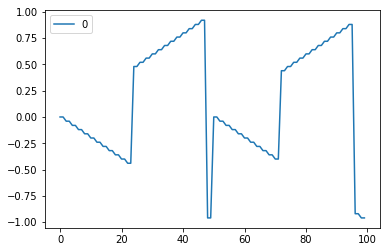

In [147]:
signal = []
gen = get_action(100, [0,4], 25)
for i in range(100):
    _, s = next(gen)
    signal.append(s)
pd.DataFrame(signal).plot()
plt.show()

In [153]:
g = RandGraph(actors=1000, graph_type='medium')
gen = get_action(100, [0,3], 25)
congestion = []
sign = 1
for i in range(100):
    if i % int(25/2) == 0:
        sign = -sign
        act,val = next(gen)
        cong,reward = g.action(act,0.5*sign)
    else:
        cong,reward = g.action(0,0)
    congestion.append( np.mean(cong))

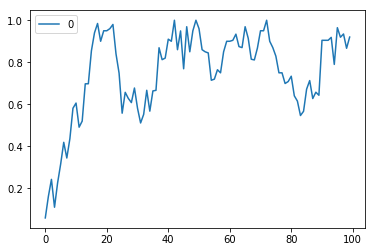

In [154]:
pd.DataFrame(congestion).plot()
plt.show()